****
# Sentiment Analysis  For Nike & Adidas
****

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. Valence Aware Dictionary and sEntiment Reasoner (VADER) - Bag of words approach
2. Textblob
3. SentiWord Net
4. Roberta Pretrained Model from 🤗
5. Huggingface Pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from textblob import TextBlob
plt.style.use('ggplot')
from rid_utils import show_category, show_distribution
from rid_sentiment import *

import warnings
warnings.filterwarnings("ignore")

C:\Users\DELL\Project\FreeWorks\Sentiment Analysis for Adidas and Twitter\Model Building\rid_sentiment.py:40: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if dat is not "No Info":


In [2]:
nike_data = pd.read_csv('nike_web_review.to_csv', index_col=[0])
adidas_data = pd.read_csv('adidas_web_review.to_csv', index_col=[0])

In [3]:
nike_tweets = pd.read_csv('nike_tweets.csv', index_col=[0])
adidas_tweets = pd.read_csv('adidas_tweets.csv', index_col=[0])

In [4]:
nike_data["Brand"] = "Nike"
adidas_data["Brand"] = "Adidas"
nike_tweets["Brand"] = "Nike"
adidas_tweets["Brand"] = "Adidas"

In [5]:
nike_data.head()

Rating  Review Date Location          Username  \
0     5.0  Sep 8, 2023       US     Manny214Fresh   
1     5.0  Sep 8, 2023       US     Manny214Fresh   
2     5.0  Sep 8, 2023       US     Manny214Fresh   
3     5.0  Sep 8, 2023       US     Manny214Fresh   
4     4.0  Sep 7, 2023       US  ChardyC719344446   

                                              Review  Fit Feedback  \
0  Jordan Low 1 The delivery was on time as sched...  True to Size   
1  Jordan Low 1 The delivery was on time as sched...  True to Size   
2  Jordan Low 1 The delivery was on time as sched...  True to Size   
3  Jordan Low 1 The delivery was on time as sched...  True to Size   
4  Runs BIG Beautiful shoes, but runs BIG. I’m us...      Runs Big   

   Comfort Feedback Recommend Feedback             title  IsPromoReview  ...  \
0  Very Comfortable                Yes  Air Jordan 1 Low          False  ...   
1  Very Comfortable                Yes  Air Jordan 1 Low          False  ...   
2  Very Comfortable                Yes  Air Jordan 1 Low          False  ...   
3  Very Comfortable                Yes  Air Jordan 1 Low          False  ...   
4           Average                Yes  Air Jordan 1 Low          False  ...   

                        colorDescription fullPrice  discounted  employeePrice  \
0             Lucky Green/White/Aquatone       110        True          53.38   
1              Palomino/White/Wild Berry       110        True          49.78   
2  Sky J Purple/White/Sky J Light Purple       110       False          66.00   
3      Black/University Blue/White/Black       110       False          66.00   
4             Lucky Green/White/Aquatone       110        True          53.38   

   currentPrice  isLaunch         pid     label ID  Brand  
0         88.97     False  1010048667  IN_STOCK  1   Nike  
1         82.97     False  1003842468  IN_STOCK  2   Nike  
2        110.00     False  1012365345  IN_STOCK  3   Nike  
3        110.00     False  1012365344  IN_STOCK  4   Nike  
4         88.97     False  1010048667  IN_STOCK  5   Nike  

[5 rows x 21 columns]

In [6]:
adidas_data.head()

Title  Price  ColoursAvailable                        ReviewTopic  \
0  Samba OG Shoes    100                 6                 Nice quality shoes   
1  Samba OG Shoes    100                 6                         Nice shoes   
2  Samba OG Shoes    100                 6                     Buy the shoes!   
3  Samba OG Shoes    100                 6  ALL GOODS SOLID! WORTH THE PRICE!   
4  Samba OG Shoes    100                 6                 Never out of style   

                                             Reviews      UserID  \
0  They match practically with  any outfit that I...   abdubs35    
1  Very nice shoes , just not as green as the pic...     THEMAN    
2  Bang on trend, comfy and cool. Would recommend...     Huggsy    
3  THAT WAS DOPE! medyo mahaba lng ng very little...  TOYOTABOY    
4  Love how light on your feet they are and comfo...    SangeBo    

                   Date  VerifiedPurchaser  IncentivizedReview  ID  \
0    September 13, 2023              False               False   1   
1   September 13, 2023               False                True   2   
2   September 12, 2023                True                True   3   
3    September 12, 2023              False               False   4   
4    September 12, 2023              False               False   5   

   Average Rating   Brand  
0             4.8  Adidas  
1             4.8  Adidas  
2             4.8  Adidas  
3             4.8  Adidas  
4             4.8  Adidas

In [7]:
nike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 4586
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4550 non-null   float64
 1   Review Date         4550 non-null   object 
 2   Location            3011 non-null   object 
 3   Username            4550 non-null   object 
 4   Review              4587 non-null   object 
 5   Fit Feedback        407 non-null    object 
 6   Comfort Feedback    407 non-null    object 
 7   Recommend Feedback  407 non-null    object 
 8   title               4587 non-null   object 
 9   IsPromoReview       4587 non-null   bool   
 10  subtitle            4587 non-null   object 
 11  colorDescription    4587 non-null   object 
 12  fullPrice           4587 non-null   int64  
 13  discounted          4587 non-null   bool   
 14  employeePrice       4587 non-null   float64
 15  currentPrice        4587 non-null   float64
 16  isLaun

In [8]:
adidas_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1707
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1708 non-null   object 
 1   Price               1708 non-null   int64  
 2   ColoursAvailable    1708 non-null   int64  
 3   ReviewTopic         1706 non-null   object 
 4   Reviews             1708 non-null   object 
 5   UserID              1708 non-null   object 
 6   Date                1640 non-null   object 
 7   VerifiedPurchaser   1708 non-null   bool   
 8   IncentivizedReview  1708 non-null   bool   
 9   ID                  1708 non-null   int64  
 10  Average Rating      1708 non-null   float64
 11  Brand               1708 non-null   object 
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 150.1+ KB


In [9]:
adidas_data.columns

Index(['Title', 'Price', 'ColoursAvailable', 'ReviewTopic', 'Reviews',
       'UserID', 'Date', 'VerifiedPurchaser', 'IncentivizedReview', 'ID',
       'Average Rating', 'Brand'],
      dtype='object')

In [10]:
adidas_data.iloc[1009:]["Reviews"]

1009    Color way is dope and perfect fit will. Buy mo...
1010    I've bought at least 4 pair of these! Super co...
1011    Not comfortable at all. Very hard to put on. T...
1012    The shoes are super uncomfortable, it hurts my...
1013    Comfortable shoes. I own them in every color a...
                              ...                        
1703    They are good to wear if you are a nurse and w...
1704    Goes well with what I had on had me feeling my...
1705    Just love my new adidas gear, never fails me t...
1706    Perfect color! Nice, comfortable shoe. I wasn’...
1707    arrived in time for a trip i was taking. broke...
Name: Reviews, Length: 699, dtype: object

In [11]:
adidas_tweets.head()

Tweets  \
0  🚨🚨🚨 Steal of the Day 🚨🚨🚨\n\nAdidas Hamburg Red...   
1   ADIDAS YEEZY 500 'ENFLAME'\n\nLAUNCHING ON MA...   
2  My  Road to Glory concepts.\nBack on FIFA 16 I...   
3   VENDO\n\nZapatillas  Adidas  RivalryRM\n\ns/....   
4  Zapatillas Adidas Rivalry RM\n\ns/.260\n\nus 8...   

                   location   Brand  
0  The Casuals Directory HQ  Adidas  
1                    Canada  Adidas  
2                       NaN  Adidas  
3          Los Olivos, Peru  Adidas  
4          Los Olivos, Peru  Adidas

In [12]:
adidas_tweets["Tweets"] = adidas_tweets['Tweets'].apply(clean_tweet)
adidas_tweets

Tweets  \
0     steal day adidas hamburg reduced ad available ...   
1     adidas yeezy enflame launching may th mens amp...   
2     road glory concepts back fifa lead qpr top hal...   
3                  vendo zapatillas adidas rivalryrm us   
4     zapatillas adidas rivalry rm us chicampvip sto...   
...                                                 ...   
2495  jordan kicks adidas nike jordans yeezy shoes b...   
2496  jordan kicks adidas nike jordans yeezy shoes b...   
2497  jordan kicks adidas nike jordans yeezy shoes b...   
2498  jordan kicks adidas nike jordans yeezy shoes b...   
2499  jordan kicks adidas nike jordans yeezy shoes b...   

                      location   Brand  
0     The Casuals Directory HQ  Adidas  
1                       Canada  Adidas  
2                          NaN  Adidas  
3             Los Olivos, Peru  Adidas  
4             Los Olivos, Peru  Adidas  
...                        ...     ...  
2495                       NaN  Adidas  
2496                       NaN  Adidas  
2497                       NaN  Adidas  
2498                       NaN  Adidas  
2499                       NaN  Adidas  

[2500 rows x 3 columns]

In [13]:
nike_tweets.head()

tweet_created_at             user_name  \
0  Fri Sep 07 16:25:06 +0000 2018       Ultra YOU Woman   
1  Fri Sep 07 16:24:59 +0000 2018  Yung Cut Up (Videos)   
2  Fri Sep 07 16:24:50 +0000 2018          Rachel Bogle   
3  Fri Sep 07 16:24:44 +0000 2018      Ervin Youngblood   
4  Fri Sep 07 16:24:39 +0000 2018      NoLuckNeeded.com   

                    user_location  \
0                 California, USA   
1                  Miami, Florida   
2                Indianapolis, IN   
3  Tennessee by way of New Jersey   
4                     Gambleville   

                                    user_description user_following  \
0  I share tips to achieve your health goals and ...          False   
1  All Business inquiries contact cluuxx@gmail.co...          False   
2  Morning Traffic Reporter @CBS4Indy | Traffic A...          False   
3  Christ-Family-Career.. \rNY\nGiants, Mets, 76e...          False   
4  https://t.co/Lnr5uRql8x is a Friendly Online G...          False   

   user_friends_count  user_followers_count user_following.1  \
0             48721.0               57983.0            False   
1              5489.0               13241.0            False   
2              2386.0               11377.0            False   
3               965.0                 218.0            False   
4             13629.0               13731.0            False   

                                     tweet_full_text  user_default_profile  \
0  Done is better than perfect. — Sheryl Sandberg...                  True   
1  Shout out to the Great Fire Department and the...                 False   
2  There are some AMAZINGLY hilarious Nike Ad mem...                 False   
3  #kapernickeffect #swoosh #justdoit @ Lucas Bis...                  True   
4  One Hand, One Dream: The Shaquem Griffin Story...                 False   

                                              Tweets Brand  
0  done better perfect sheryl sandberg quote moti...  Nike  
1  shout great fire department tour much love nyc...  Nike  
2  amazingly hilarious nike ad memes happening ne...  Nike  
3  kapernickeffect swoosh justdoit lucas bishops ...  Nike  
4  one hand one dream shaquem griffin story shaqu...  Nike

In [14]:
nike1 = nike_tweets[["Brand","user_location","Tweets"]].rename(columns={"user_location": "Location"})
adidas1 = adidas_tweets.rename(columns={"location": "Location"})
tweets = pd.concat([nike1, adidas1])
tweets.head()

Brand                        Location  \
0  Nike                 California, USA   
1  Nike                  Miami, Florida   
2  Nike                Indianapolis, IN   
3  Nike  Tennessee by way of New Jersey   
4  Nike                     Gambleville   

                                              Tweets  
0  done better perfect sheryl sandberg quote moti...  
1  shout great fire department tour much love nyc...  
2  amazingly hilarious nike ad memes happening ne...  
3  kapernickeffect swoosh justdoit lucas bishops ...  
4  one hand one dream shaquem griffin story shaqu...

In [15]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7589 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     7589 non-null   object
 1   Location  5676 non-null   object
 2   Tweets    7589 non-null   object
dtypes: object(3)
memory usage: 237.2+ KB


In [16]:
nike_data.columns

Index(['Rating', 'Review Date', 'Location', 'Username', 'Review',
       'Fit Feedback', 'Comfort Feedback', 'Recommend Feedback', 'title',
       'IsPromoReview', 'subtitle', 'colorDescription', 'fullPrice',
       'discounted', 'employeePrice', 'currentPrice', 'isLaunch', 'pid',
       'label', 'ID', 'Brand'],
      dtype='object')

In [17]:
adidas_data.columns

Index(['Title', 'Price', 'ColoursAvailable', 'ReviewTopic', 'Reviews',
       'UserID', 'Date', 'VerifiedPurchaser', 'IncentivizedReview', 'ID',
       'Average Rating', 'Brand'],
      dtype='object')

In [18]:
nike2 = nike_data[['ID', 'Username',"Brand",'title', 'currentPrice','Rating',
                   'Review']].rename(columns={"Username": "UserID",
                                              "title":"Product",
                                              'currentPrice': "Price",
                                              "Review":"Reviews"})

adidas2 = adidas_data[['ID', 'UserID', "Brand",'Title', 'Price', 'Average Rating', 
                       'Reviews']].rename(columns={'Average Rating':"Rating", "Title":"Product"})
df = pd.concat([nike2, adidas2])
df.head()

ID            UserID Brand           Product   Price  Rating  \
0   1     Manny214Fresh  Nike  Air Jordan 1 Low   88.97     5.0   
1   2     Manny214Fresh  Nike  Air Jordan 1 Low   82.97     5.0   
2   3     Manny214Fresh  Nike  Air Jordan 1 Low  110.00     5.0   
3   4     Manny214Fresh  Nike  Air Jordan 1 Low  110.00     5.0   
4   5  ChardyC719344446  Nike  Air Jordan 1 Low   88.97     4.0   

                                             Reviews  
0  Jordan Low 1 The delivery was on time as sched...  
1  Jordan Low 1 The delivery was on time as sched...  
2  Jordan Low 1 The delivery was on time as sched...  
3  Jordan Low 1 The delivery was on time as sched...  
4  Runs BIG Beautiful shoes, but runs BIG. I’m us...

In [19]:
df.shape

(6295, 7)

****
# Valence Aware Dictionary and sEntiment Reasoner (VADER) Sentiment 
****

The NLTK `SentimentIntensityAnalyzer` would be used  to get the neg/neu/pos scores of the the Sentiments.

`This uses a "bag of words" approach: Stop words are removed and each word is scored and combined to a total score.`

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [21]:
sia.polarity_scores(df.iloc[1001]['Reviews'])

{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.9676}

In [22]:
df["Reviews"]

0       Jordan Low 1 The delivery was on time as sched...
1       Jordan Low 1 The delivery was on time as sched...
2       Jordan Low 1 The delivery was on time as sched...
3       Jordan Low 1 The delivery was on time as sched...
4       Runs BIG Beautiful shoes, but runs BIG. I’m us...
                              ...                        
1703    They are good to wear if you are a nurse and w...
1704    Goes well with what I had on had me feeling my...
1705    Just love my new adidas gear, never fails me t...
1706    Perfect color! Nice, comfortable shoe. I wasn’...
1707    arrived in time for a trip i was taking. broke...
Name: Reviews, Length: 6295, dtype: object

In [23]:
# Apply VADER sentiment analysis to the 'Review' column
df[['Vader_Pos', 'Vader_Neg', 'Vader_Neu', 'Vader_Polarity']] = df['Reviews'].apply(lambda x: pd.Series(get_vader_scores(x)))

In [24]:
df

ID            UserID   Brand                       Product   Price  \
0        1     Manny214Fresh    Nike              Air Jordan 1 Low   88.97   
1        2     Manny214Fresh    Nike              Air Jordan 1 Low   82.97   
2        3     Manny214Fresh    Nike              Air Jordan 1 Low  110.00   
3        4     Manny214Fresh    Nike              Air Jordan 1 Low  110.00   
4        5  ChardyC719344446    Nike              Air Jordan 1 Low   88.97   
...    ...               ...     ...                           ...     ...   
1703  1704           Unknown  Adidas  Adifom Stan Smith Mule Shoes   70.00   
1704  1705           Unknown  Adidas  Adifom Stan Smith Mule Shoes   70.00   
1705  1706           Unknown  Adidas  Adifom Stan Smith Mule Shoes   70.00   
1706  1707           Unknown  Adidas  Adifom Stan Smith Mule Shoes   70.00   
1707  1708           Unknown  Adidas  Adifom Stan Smith Mule Shoes   70.00   

      Rating                                            Reviews  Vader_Pos  \
0        5.0  Jordan Low 1 The delivery was on time as sched...      0.297   
1        5.0  Jordan Low 1 The delivery was on time as sched...      0.297   
2        5.0  Jordan Low 1 The delivery was on time as sched...      0.297   
3        5.0  Jordan Low 1 The delivery was on time as sched...      0.297   
4        4.0  Runs BIG Beautiful shoes, but runs BIG. I’m us...      0.208   
...      ...                                                ...        ...   
1703     4.0  They are good to wear if you are a nurse and w...      0.231   
1704     4.0  Goes well with what I had on had me feeling my...      0.444   
1705     4.0  Just love my new adidas gear, never fails me t...      0.495   
1706     4.0  Perfect color! Nice, comfortable shoe. I wasn’...      0.505   
1707     4.0  arrived in time for a trip i was taking. broke...      0.313   

      Vader_Neg  Vader_Neu  Vader_Polarity  
0         0.045      0.659          0.9164  
1         0.045      0.659          0.9164  
2         0.045      0.659          0.9164  
3         0.045      0.659          0.9164  
4         0.000      0.792          0.7424  
...         ...        ...             ...  
1703      0.000      0.769          0.4939  
1704      0.000      0.556          0.6597  
1705      0.000      0.505          0.8951  
1706      0.145      0.350          0.8016  
1707      0.122      0.565          0.6597  

[6295 rows x 11 columns]

***
># Visualising VADER Results
***

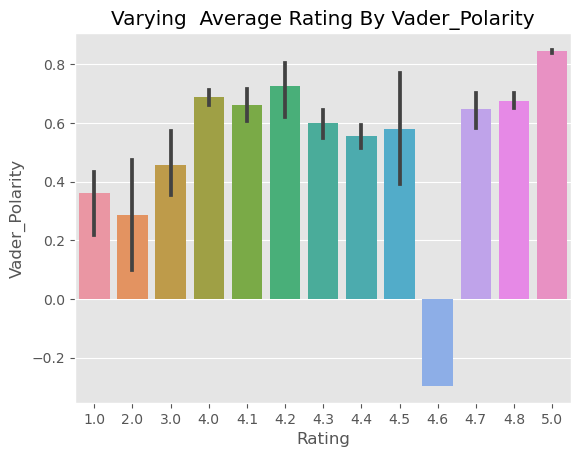

In [25]:
show_compound_view(df, "Vader_Polarity")

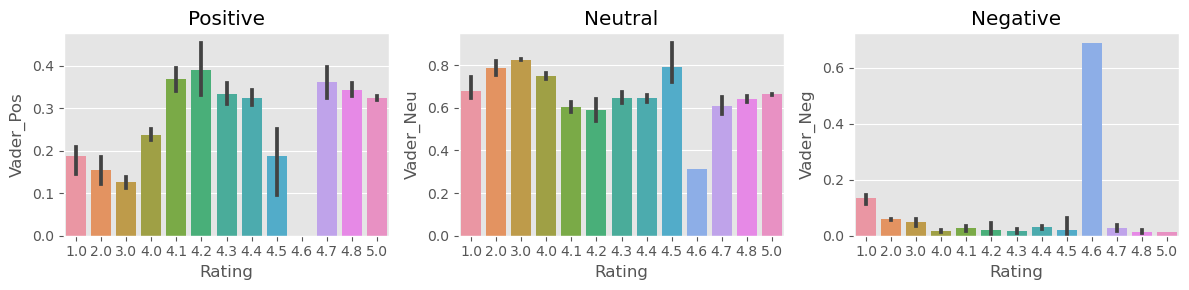

In [26]:
show_all_scores(df, "Vader_Pos", "Vader_Neu", "Vader_Neg")

***
# TextBlob
***

In [27]:
def get_textblob_scores(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        return polarity, 0, 0, 'positive', polarity
    elif polarity < 0:
        return 0, abs(polarity), 0, 'negative', polarity
    else:
        return 0, 0, 0, 'neutral', polarity

# Apply TextBlob sentiment analysis to the 'Review' column
df[['TextBlob_Pos', 'TextBlob_Neg', 'TextBlob_Neu', 'TextBlob_Polarity_Type', 'TextBlob_Polarity']] = df['Reviews'].apply(lambda x: pd.Series(get_textblob_scores(x)))


In [28]:
df.head()

ID            UserID Brand           Product   Price  Rating  \
0   1     Manny214Fresh  Nike  Air Jordan 1 Low   88.97     5.0   
1   2     Manny214Fresh  Nike  Air Jordan 1 Low   82.97     5.0   
2   3     Manny214Fresh  Nike  Air Jordan 1 Low  110.00     5.0   
3   4     Manny214Fresh  Nike  Air Jordan 1 Low  110.00     5.0   
4   5  ChardyC719344446  Nike  Air Jordan 1 Low   88.97     4.0   

                                             Reviews  Vader_Pos  Vader_Neg  \
0  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
1  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
2  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
3  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
4  Runs BIG Beautiful shoes, but runs BIG. I’m us...      0.208      0.000   

   Vader_Neu  Vader_Polarity  TextBlob_Pos  TextBlob_Neg  TextBlob_Neu  \
0      0.659          0.9164      0.405357           0.0             0   
1      0.659          0.9164      0.405357           0.0             0   
2      0.659          0.9164      0.405357           0.0             0   
3      0.659          0.9164      0.405357           0.0             0   
4      0.792          0.7424      0.030864           0.0             0   

  TextBlob_Polarity_Type  TextBlob_Polarity  
0               positive           0.405357  
1               positive           0.405357  
2               positive           0.405357  
3               positive           0.405357  
4               positive           0.030864

***
># Visualising TextBlob Results
***

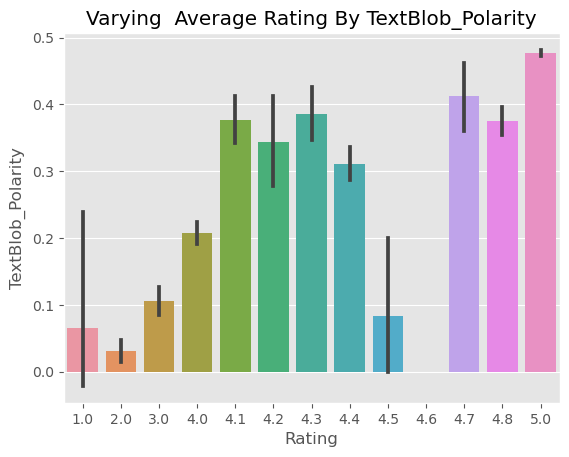

In [29]:
show_compound_view(df, "TextBlob_Polarity")

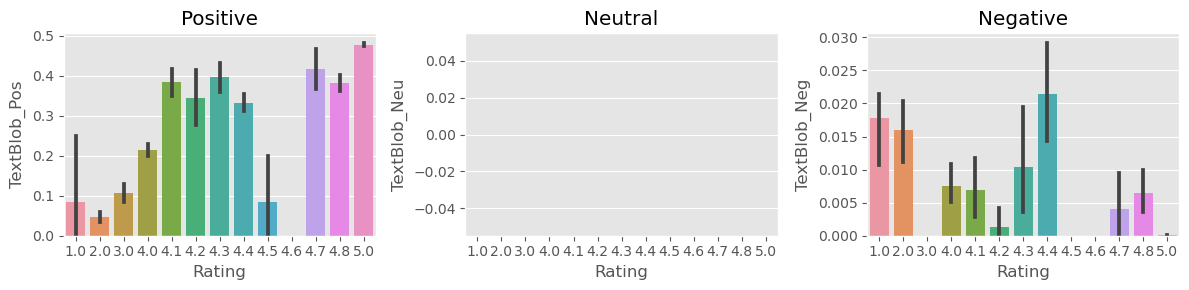

In [30]:
show_all_scores(df, "TextBlob_Pos", "TextBlob_Neu", "TextBlob_Neg")

***
# SentiWordNet
***

In [31]:
df[['SentiWordNet_Pos', 'SentiWordNet_Neg', 'SentiWordNet_Neu']] = df['Reviews'].apply(lambda x: pd.Series(get_sentiwordnet_scores(x)))

df['SentiWordNet_Polarity'] = df['SentiWordNet_Pos'] - df['SentiWordNet_Neg']


***
># Visualising SentiWordNet Results
***

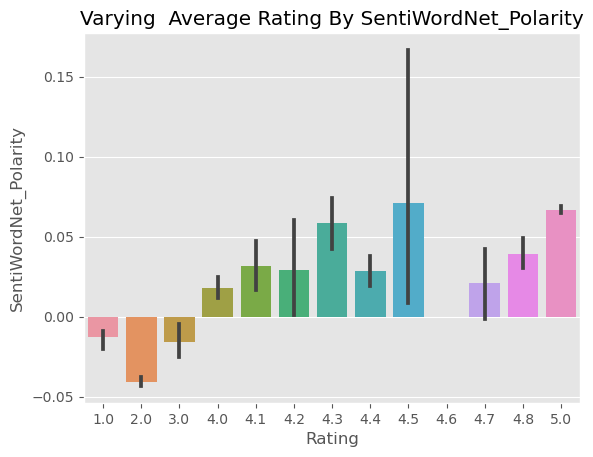

In [32]:
show_compound_view(df, 'SentiWordNet_Polarity')

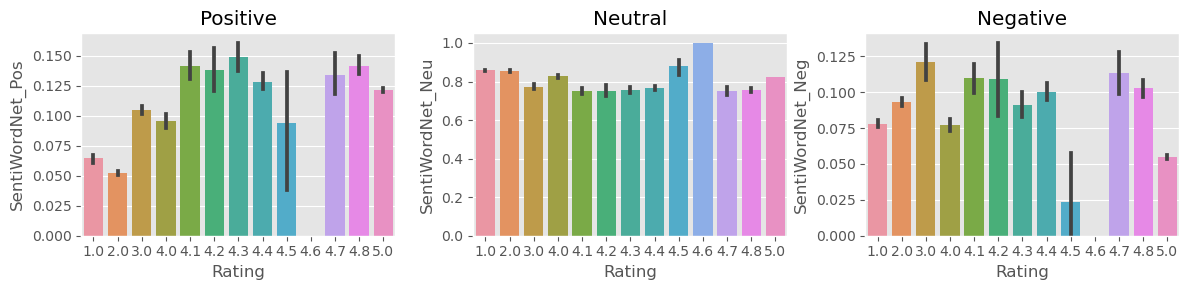

In [33]:
show_all_scores(df, 'SentiWordNet_Pos', 'SentiWordNet_Neu', 'SentiWordNet_Neg')

In [34]:
df.columns

Index(['ID', 'UserID', 'Brand', 'Product', 'Price', 'Rating', 'Reviews',
       'Vader_Pos', 'Vader_Neg', 'Vader_Neu', 'Vader_Polarity', 'TextBlob_Pos',
       'TextBlob_Neg', 'TextBlob_Neu', 'TextBlob_Polarity_Type',
       'TextBlob_Polarity', 'SentiWordNet_Pos', 'SentiWordNet_Neg',
       'SentiWordNet_Neu', 'SentiWordNet_Polarity'],
      dtype='object')

***
# Combine and compare Results
***

In [35]:
df.head()

ID            UserID Brand           Product   Price  Rating  \
0   1     Manny214Fresh  Nike  Air Jordan 1 Low   88.97     5.0   
1   2     Manny214Fresh  Nike  Air Jordan 1 Low   82.97     5.0   
2   3     Manny214Fresh  Nike  Air Jordan 1 Low  110.00     5.0   
3   4     Manny214Fresh  Nike  Air Jordan 1 Low  110.00     5.0   
4   5  ChardyC719344446  Nike  Air Jordan 1 Low   88.97     4.0   

                                             Reviews  Vader_Pos  Vader_Neg  \
0  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
1  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
2  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
3  Jordan Low 1 The delivery was on time as sched...      0.297      0.045   
4  Runs BIG Beautiful shoes, but runs BIG. I’m us...      0.208      0.000   

   Vader_Neu  Vader_Polarity  TextBlob_Pos  TextBlob_Neg  TextBlob_Neu  \
0      0.659          0.9164      0.405357           0.0             0   
1      0.659          0.9164      0.405357           0.0             0   
2      0.659          0.9164      0.405357           0.0             0   
3      0.659          0.9164      0.405357           0.0             0   
4      0.792          0.7424      0.030864           0.0             0   

  TextBlob_Polarity_Type  TextBlob_Polarity  SentiWordNet_Pos  \
0               positive           0.405357          0.135870   
1               positive           0.405357          0.135870   
2               positive           0.405357          0.135870   
3               positive           0.405357          0.135870   
4               positive           0.030864          0.066667   

   SentiWordNet_Neg  SentiWordNet_Neu  SentiWordNet_Polarity  
0          0.119565          0.744565               0.016304  
1          0.119565          0.744565               0.016304  
2          0.119565          0.744565               0.016304  
3          0.119565          0.744565               0.016304  
4          0.066667          0.866667               0.000000

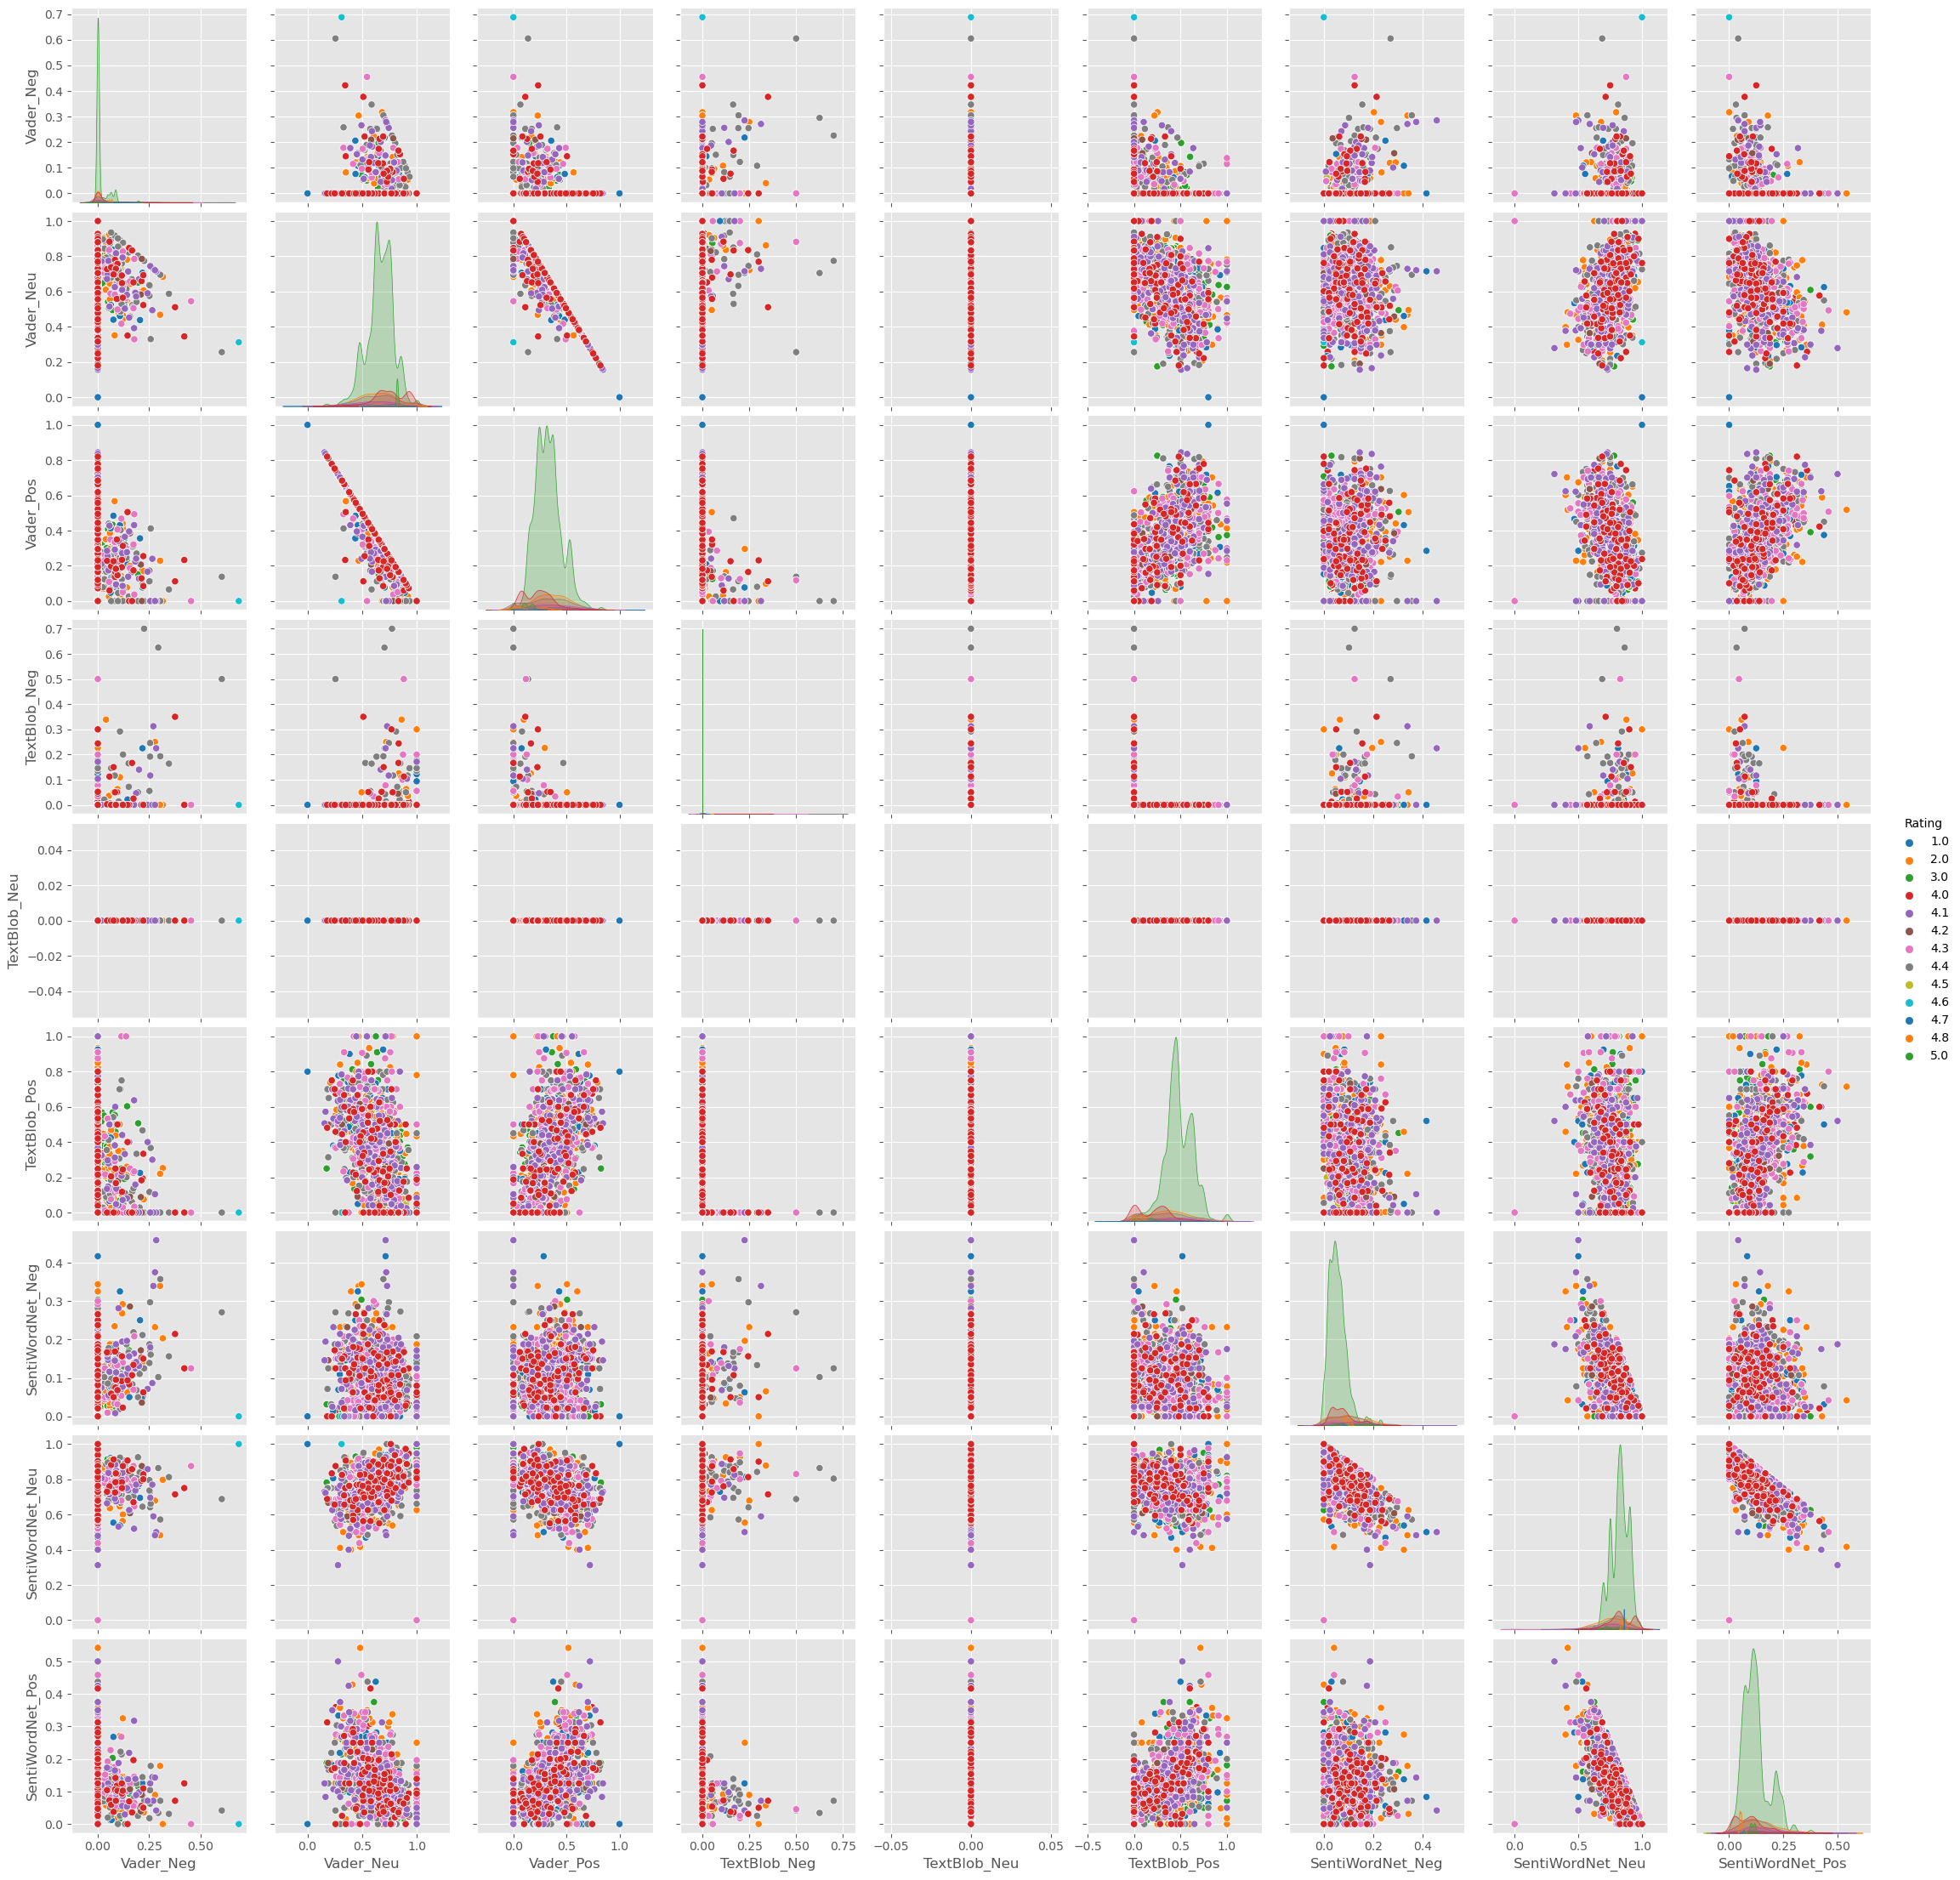

In [36]:
show_pairplot(df)

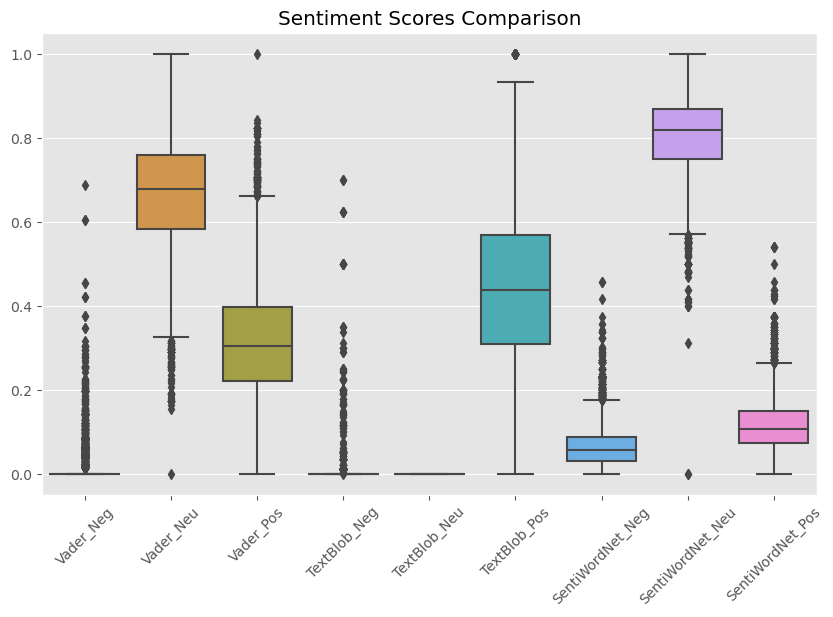

In [37]:
show_sentiment_score_comparison(df)

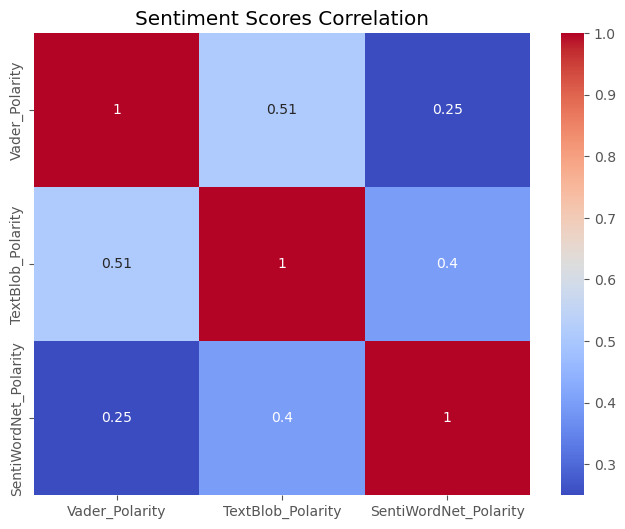

In [38]:
show_polarity_heatmap(df)

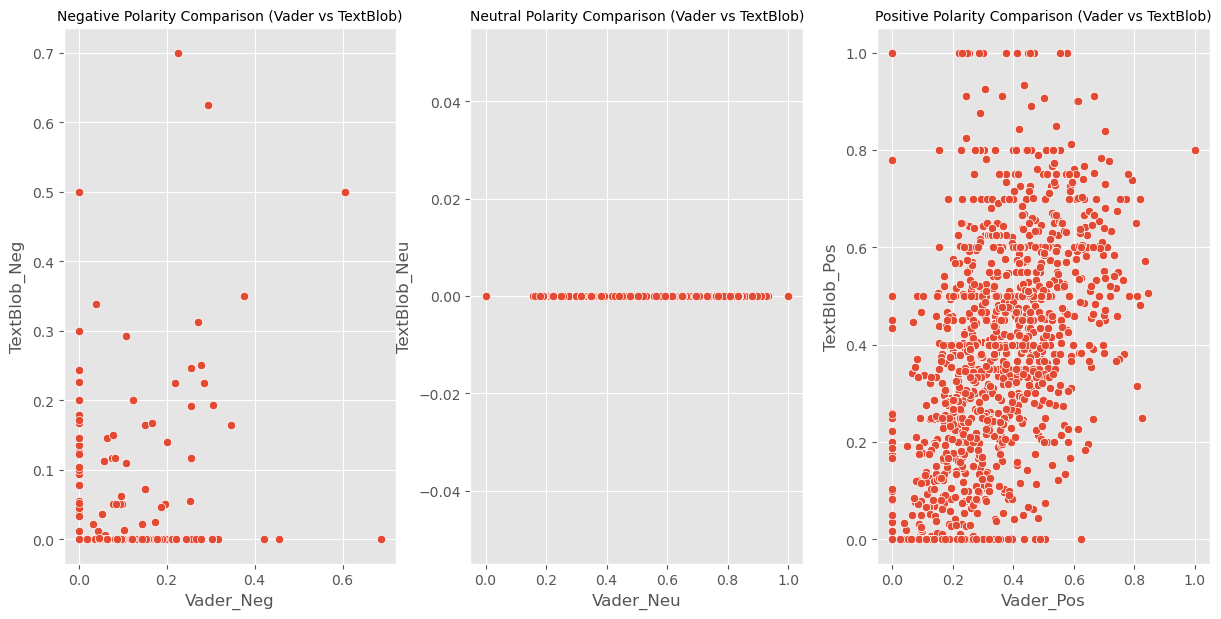

In [39]:
show_polarity_scores(df, 'Vader', 'TextBlob', size=10)

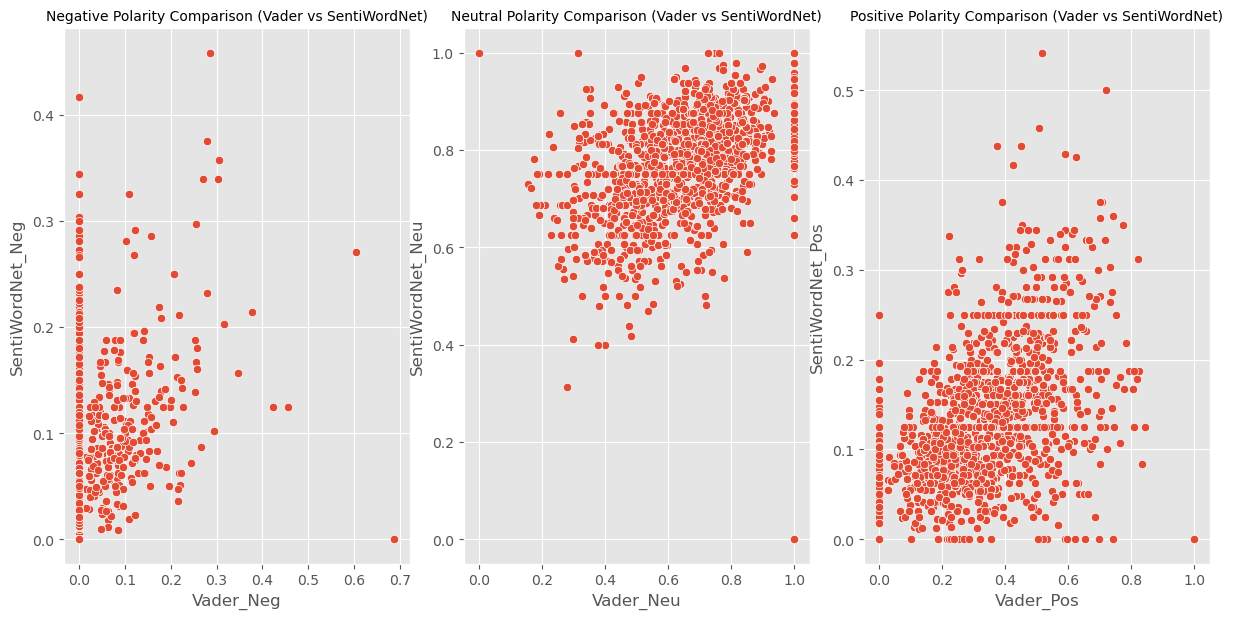

In [40]:
show_polarity_scores(df, 'Vader', 'SentiWordNet', size=10)

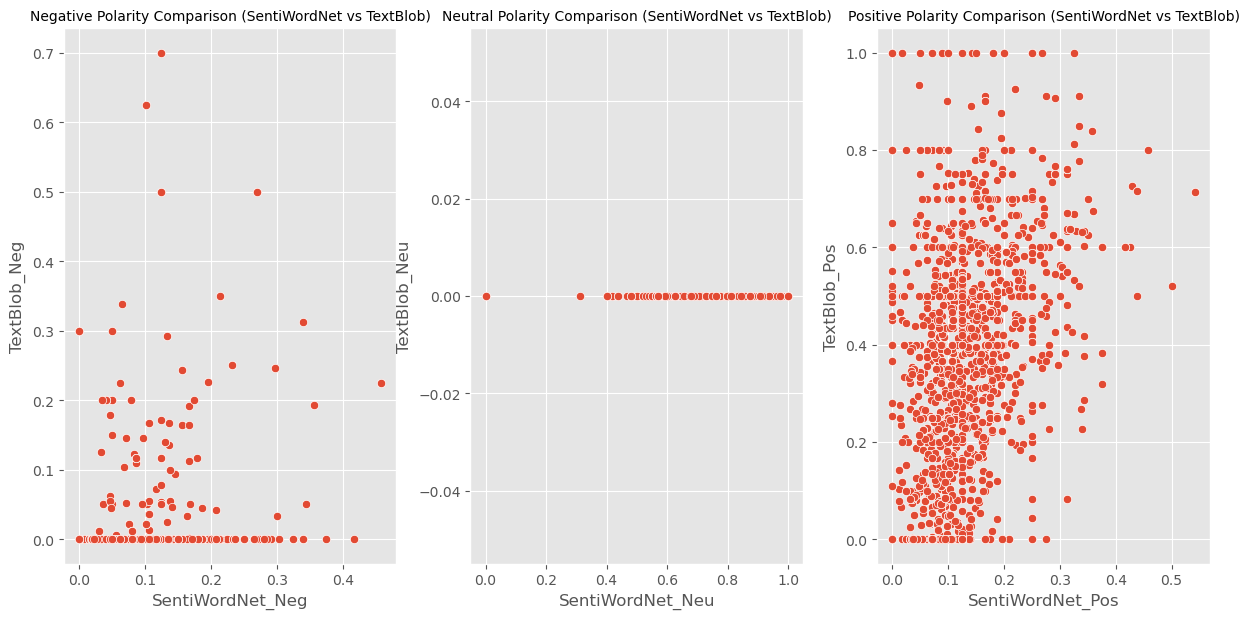

In [41]:
show_polarity_scores(df, 'SentiWordNet', 'TextBlob', size=10)

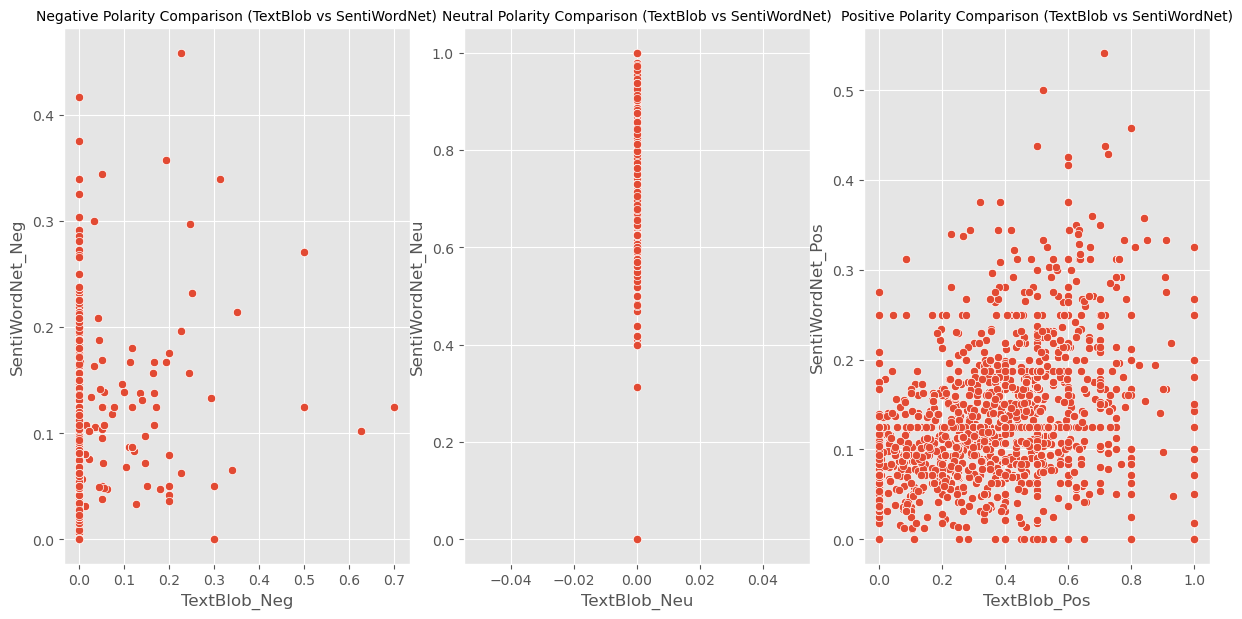

In [42]:
show_polarity_scores(df, 'TextBlob', 'SentiWordNet', size=10)

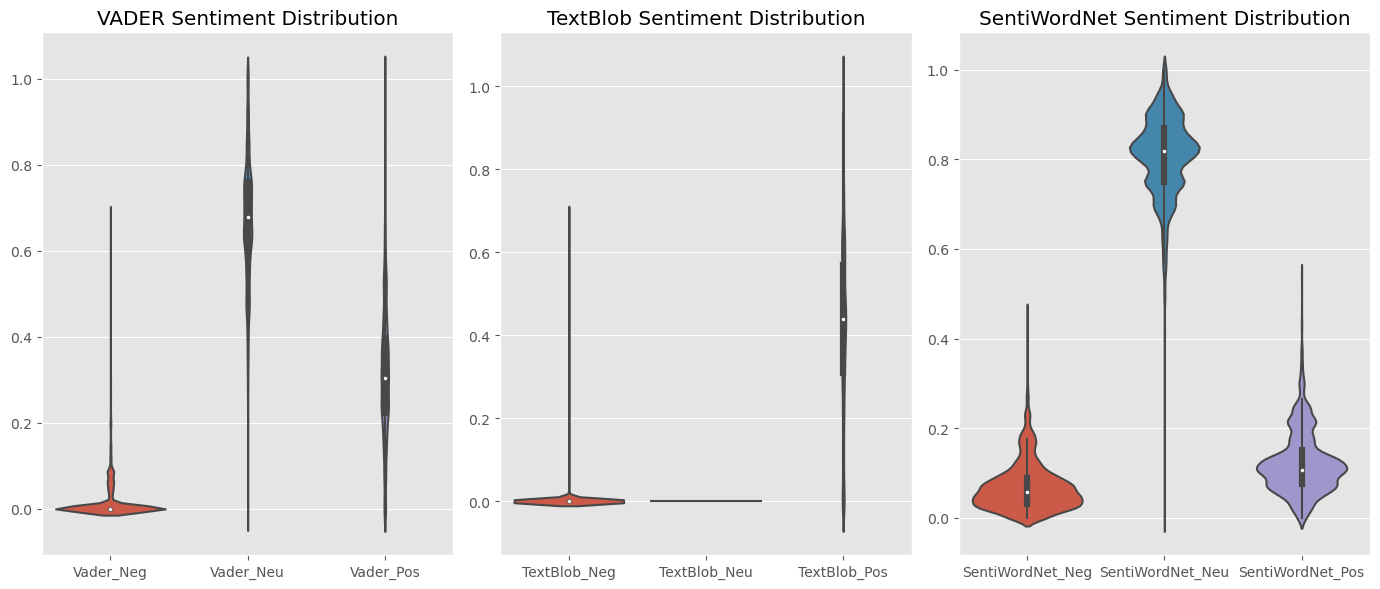

In [43]:
show_violinplot(df)

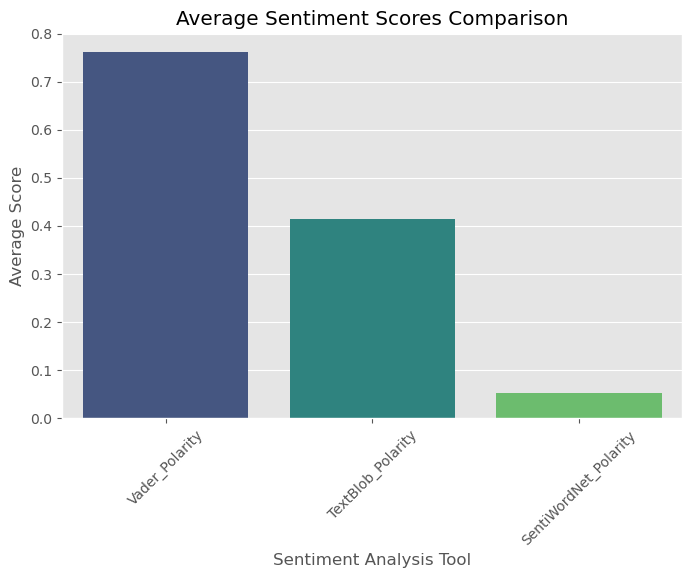

In [44]:
show_barplot(df)

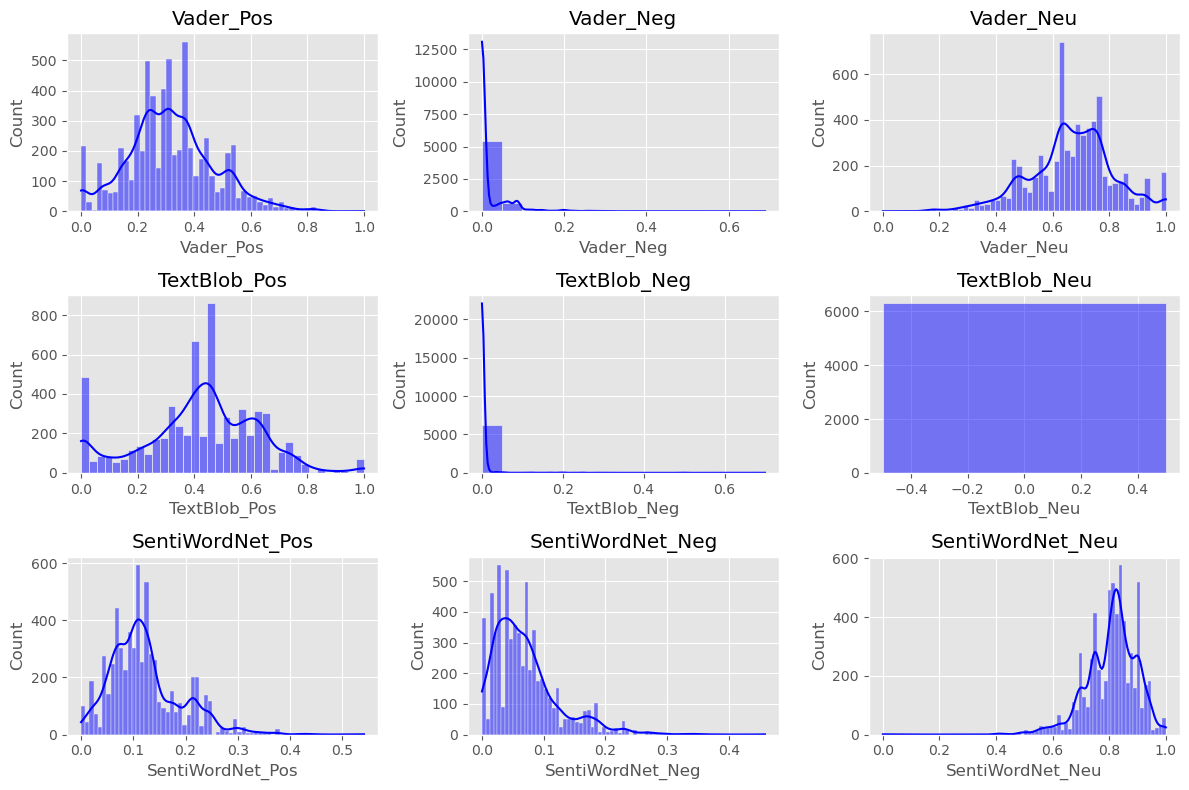

In [45]:
show_distribution_column(df)

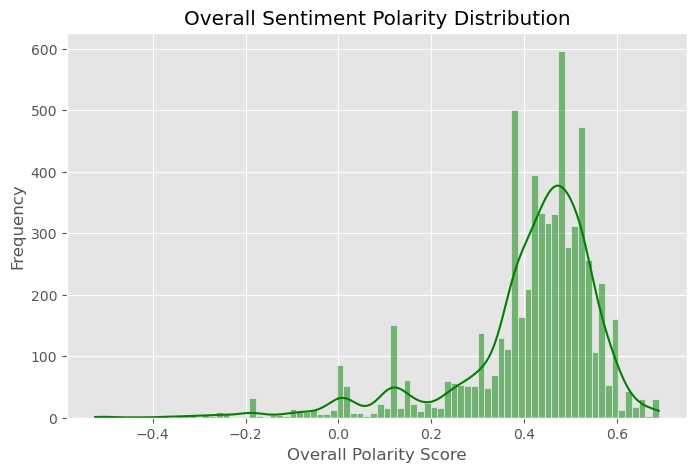

In [46]:
show_kdeplot(df)

***
# Tweets Data
****

In [54]:
tweets[['Vader_Pos', 'Vader_Neg', 'Vader_Neu', 'Vader_Polarity']] = tweets['Tweets'].apply(lambda x: pd.Series(get_vader_scores(x)))
tweets[['TextBlob_Pos', 'TextBlob_Neg', 'TextBlob_Neu', 'TextBlob_Polarity_Type', 'TextBlob_Polarity']] = tweets['Tweets'].apply(lambda x: pd.Series(get_textblob_scores(x)))

tweets[['SentiWordNet_Pos', 'SentiWordNet_Neg', 'SentiWordNet_Neu']] = tweets['Tweets'].apply(lambda x: pd.Series(get_sentiwordnet_scores(x)))
tweets['SentiWordNet_Polarity'] = tweets['SentiWordNet_Pos'] -tweets['SentiWordNet_Neg']


In [55]:
tweets.head()

Brand                        Location  \
0  Nike                 California, USA   
1  Nike                  Miami, Florida   
2  Nike                Indianapolis, IN   
3  Nike  Tennessee by way of New Jersey   
4  Nike                     Gambleville   

                                              Tweets  Vader_Pos  Vader_Neg  \
0  done better perfect sheryl sandberg quote moti...      0.643      0.000   
1  shout great fire department tour much love nyc...      0.393      0.079   
2  amazingly hilarious nike ad memes happening ne...      0.301      0.000   
3  kapernickeffect swoosh justdoit lucas bishops ...      0.000      0.000   
4  one hand one dream shaquem griffin story shaqu...      0.302      0.000   

   Vader_Neu  Vader_Polarity  TextBlob_Pos  TextBlob_Neg  TextBlob_Neu  \
0      0.357          0.8402      0.750000           0.0             0   
1      0.528          0.8885      0.650000           0.0             0   
2      0.699          0.6808      0.270833           0.0             0   
3      1.000          0.0000      0.000000           0.0             0   
4      0.698          0.6369      0.000000           0.0             0   

  TextBlob_Polarity_Type  TextBlob_Polarity  SentiWordNet_Pos  \
0               positive           0.750000          0.300000   
1               positive           0.650000          0.140625   
2               positive           0.270833          0.069444   
3                neutral           0.000000          0.000000   
4                neutral           0.000000          0.083333   

   SentiWordNet_Neg  SentiWordNet_Neu  SentiWordNet_Polarity  
0          0.025000          0.675000               0.275000  
1          0.015625          0.843750               0.125000  
2          0.097222          0.833333              -0.027778  
3          0.000000          1.000000               0.000000  
4          0.000000          0.916667               0.083333

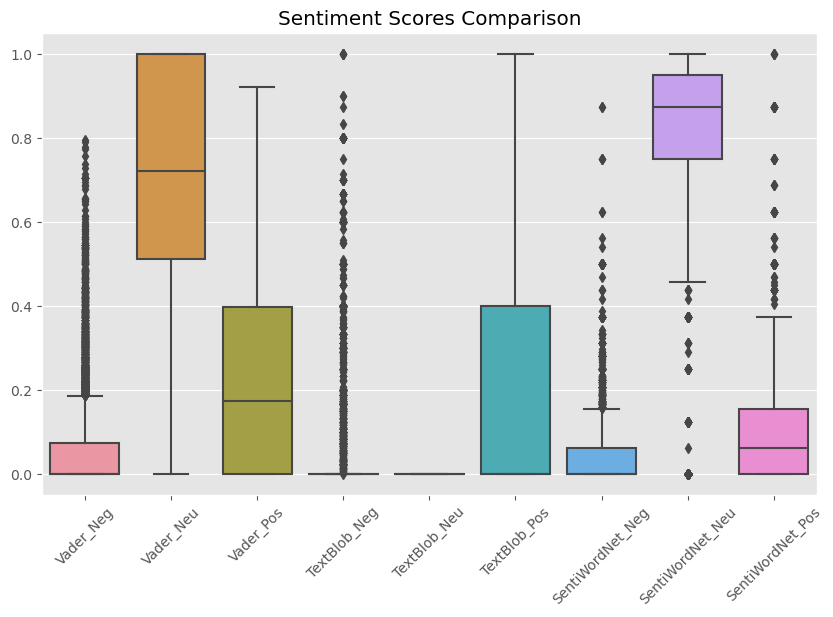

In [56]:
show_sentiment_score_comparison(tweets)

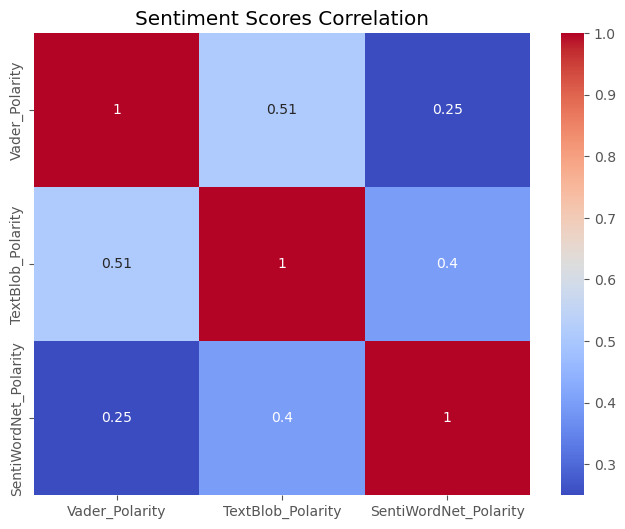

In [57]:
show_polarity_heatmap(df)

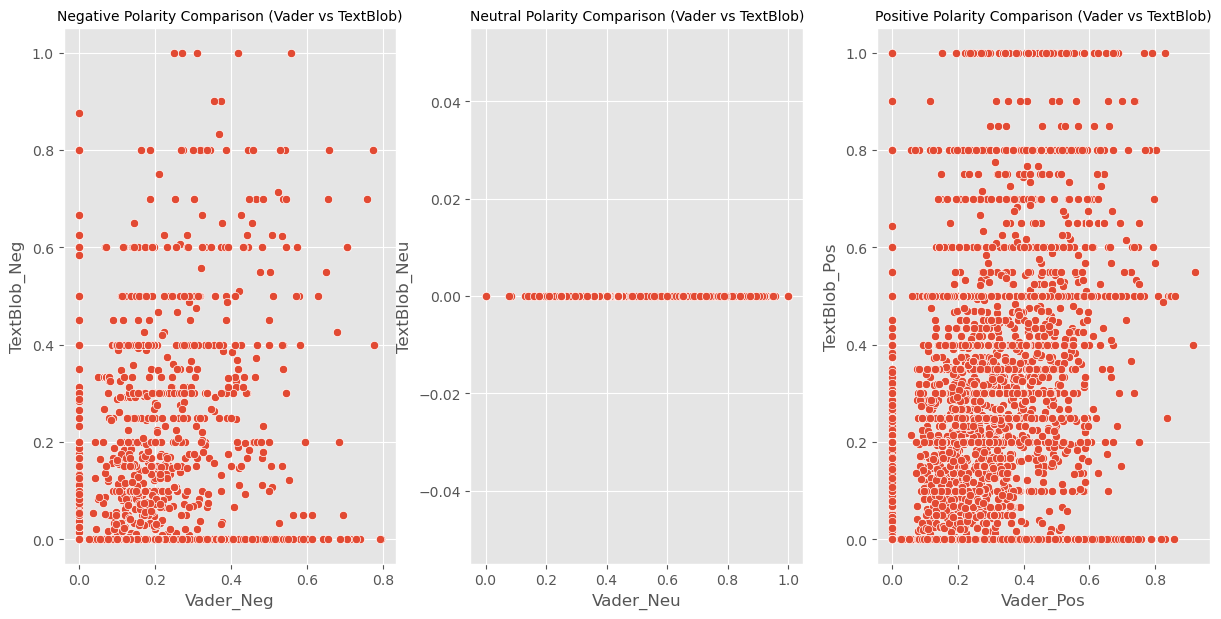

In [59]:
show_polarity_scores(tweets, 'Vader', 'TextBlob', size=10)

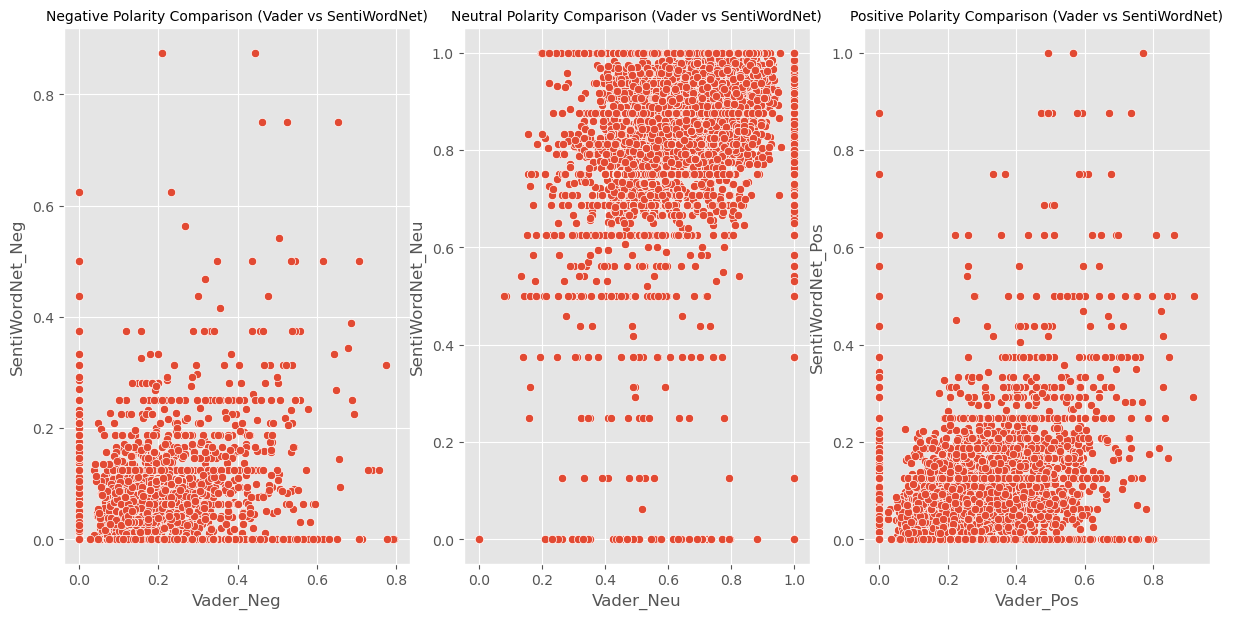

In [60]:
show_polarity_scores(tweets, 'Vader', 'SentiWordNet', size=10)

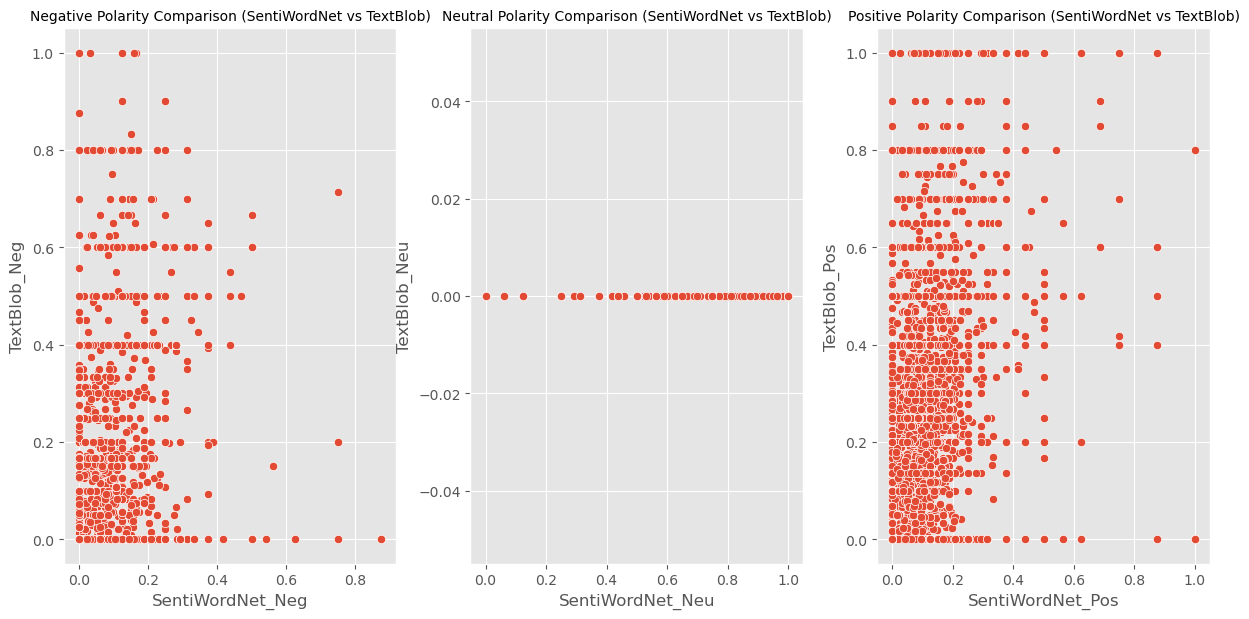

In [61]:
show_polarity_scores(tweets, 'SentiWordNet', 'TextBlob', size=10)

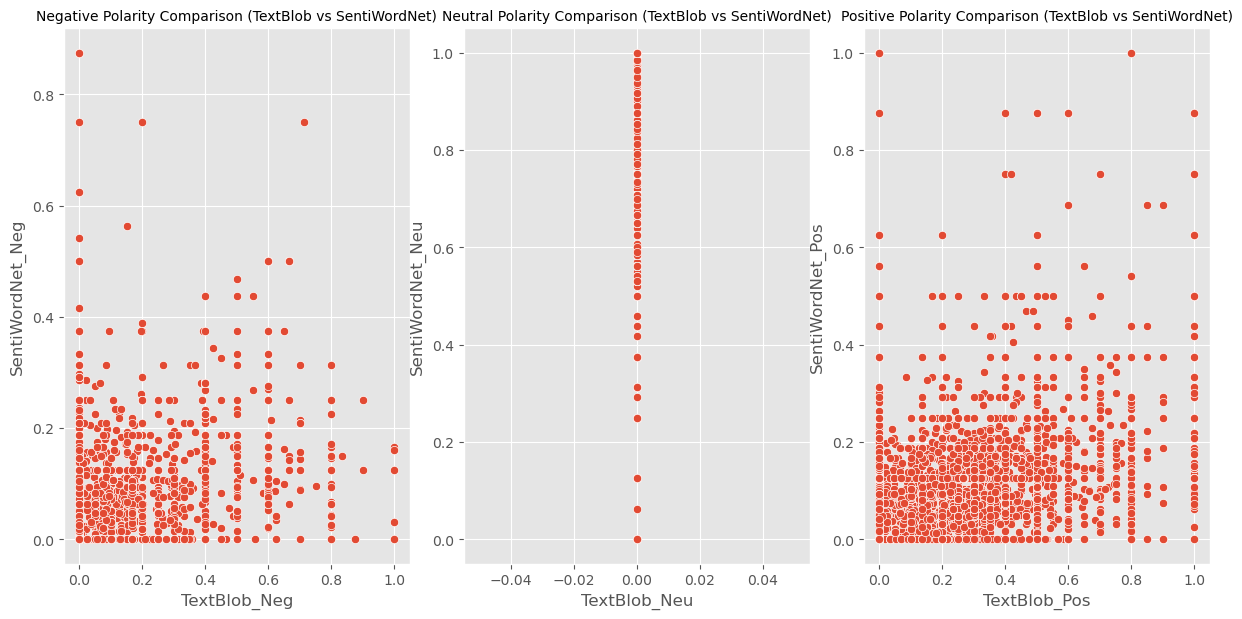

In [63]:
show_polarity_scores(tweets, 'TextBlob', 'SentiWordNet', size=10)

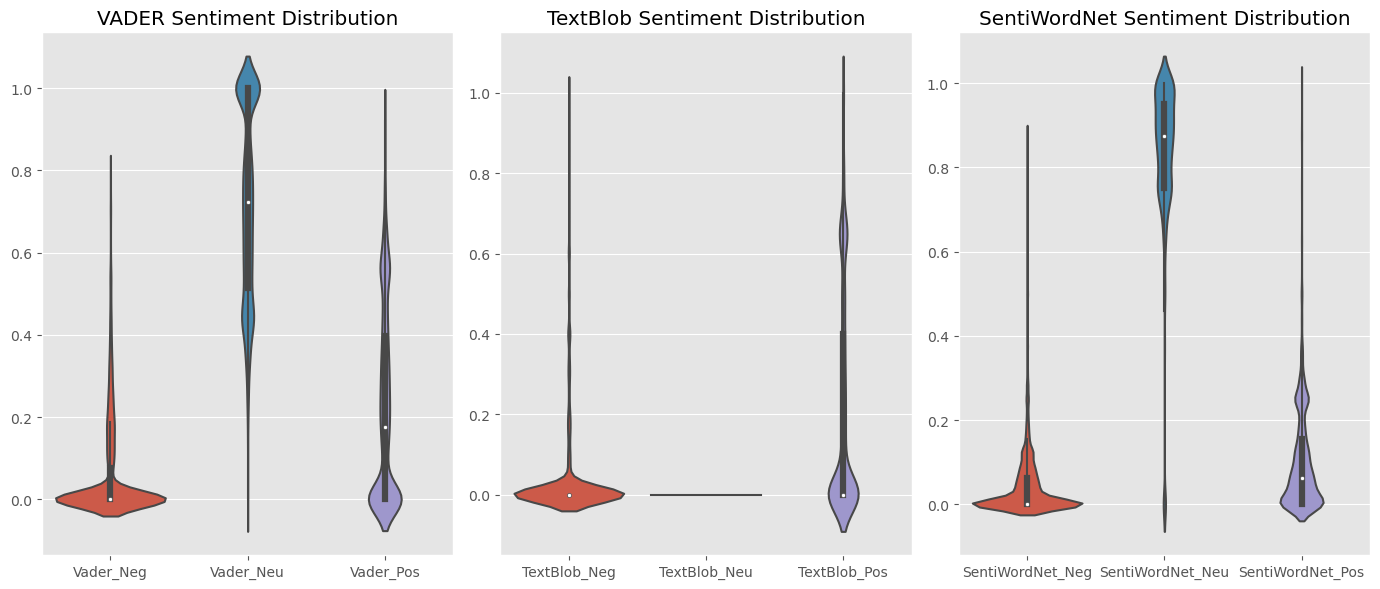

In [64]:
show_violinplot(tweets)

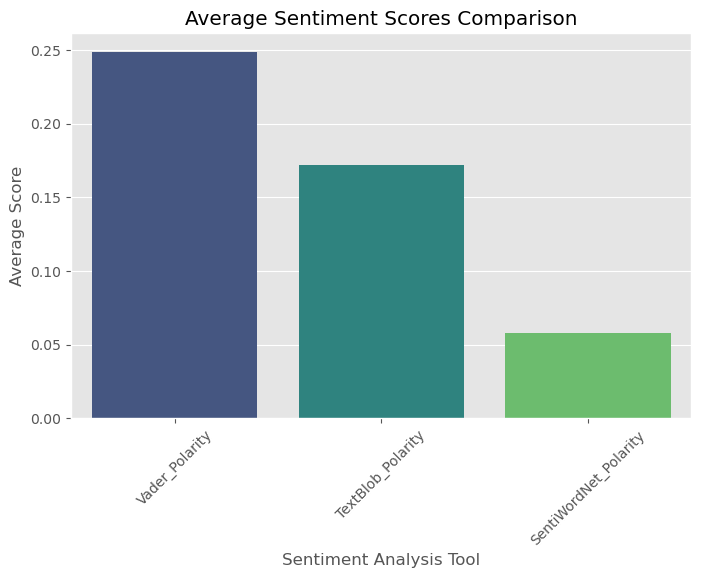

In [66]:
show_barplot(tweets)

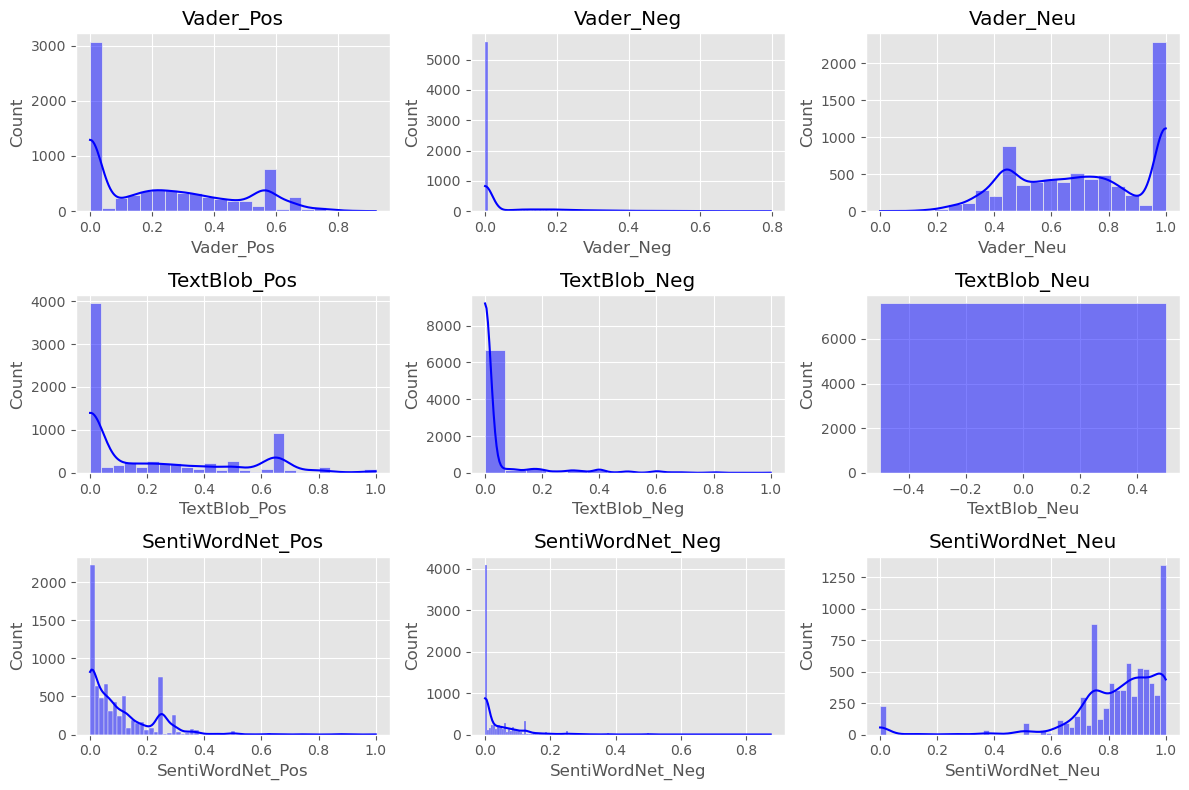

In [67]:
show_distribution_column(tweets)

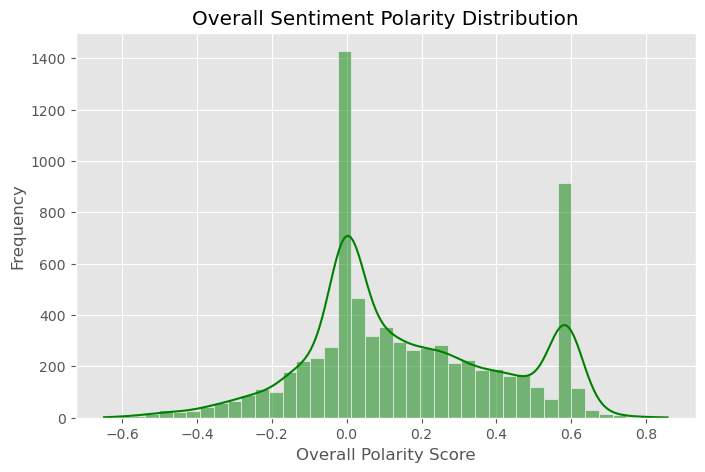

In [68]:
show_kdeplot(tweets)

***
# Conclusion
***